<a href="https://colab.research.google.com/github/alissaleigh/food-sales-predictions/blob/main/Final_Part_Correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing and Loading Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn import set_config
import seaborn as sns
import pandas as pd
import numpy as np
set_config(display='diagram')

In [3]:
filename = '/content/drive/MyDrive/panda/sales_predictions.csv'
df = pd.read_csv(filename)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##Data Cleaning

Removing Columns

In [4]:
df = df.drop(columns=['Item_Identifier', 'Outlet_Identifier'])
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


Duplicates:


In [5]:
df.duplicated().sum()

0

Identifing Missing Values:

In [6]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [7]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [8]:
df.isna().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
print(df.isna().sum().sum(), 'missing values')

3873 missing values


##Ordinal Encoding

I'm chosing to use ordinal encoding as most of the columns would fall under something that should in some way be ordered, with just few expection.

In [10]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [11]:
df['Item_Fat_Content'].replace({'Low Fat':0, 'Regular':1}, inplace=True)
df['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

In [12]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [13]:
df['Outlet_Size'].replace({'Small':0, 'Medium':1, 'High':2}, inplace=True)
df['Outlet_Size'].value_counts()

1.0    2793
0.0    2388
2.0     932
Name: Outlet_Size, dtype: int64

In [14]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [15]:
df['Outlet_Location_Type'].replace({'Tier 1':0, 'Tier 2':1, 'Tier 3':2}, inplace=True)
df['Outlet_Location_Type'].value_counts()

2    3350
1    2785
0    2388
Name: Outlet_Location_Type, dtype: int64

In [16]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [17]:
df['Outlet_Type'].replace({'Grocery Store':0, 'Supermarket Type1':1, 'Supermarket Type2':2, 'Supermarket Type3':3}, inplace=True)
df['Outlet_Type'].value_counts()

1    5577
0    1083
3     935
2     928
Name: Outlet_Type, dtype: int64

In [18]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [19]:
df['Item_Type'].replace({'Fruits and Vegetables':0, 'Snack Foods':1, 'Household':2, 'Frozen Foods':3, 'Dairy':4,
                         'Canned':5, 'Baking Goods':6, 'Health and Hygiene':7, 'Soft Drinks':8, 'Meat':9, 'Breads':10,
                         'Hard Drinks':11, 'Others':12, 'Starchy Foods':13, 'Breakfast':14, 'Seafood':15}, inplace=True)
df['Item_Type'].value_counts()

0     1232
1     1200
2      910
3      856
4      682
5      649
6      648
7      520
8      445
9      425
10     251
11     214
12     169
13     148
14     110
15      64
Name: Item_Type, dtype: int64

##Train/Split Data

In [20]:
#Splitting and testing the data
X = df.drop(columns=['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

##Column Transformer

In [21]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [22]:
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore')

In [23]:
num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)

In [24]:
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')

In [25]:
col_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f804debab80>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f804debc550>)])

In [26]:
X_train_processed = col_transformer.transform(X_train)
X_test_processed = col_transformer.transform(X_test)

In [27]:
X_train_df = pd.DataFrame(X_train_processed)
X_train_df.head()

,0,1,2,3,4,5,6,7,8
0,0.743119,-0.740321,-0.712775,-0.638156,1.828109,1.327849,0.345180,1.084948,0.983572
1,0.505876,1.350766,-1.291052,-0.903618,0.603369,1.327849,0.345180,1.084948,0.983572
2,-0.119583,1.350766,1.813319,1.220080,0.244541,0.136187,0.345180,-1.384777,-0.263600
3,-1.063163,-0.740321,-1.004931,0.423693,-0.952591,0.732018,-1.093333,-0.149914,-0.263600
4,1.390145,-0.740321,-0.965484,-0.372694,-0.336460,0.493686,NaN,-0.149914,-0.263600


In [28]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5285 non-null   float64
 1   1       6392 non-null   float64
 2   2       6392 non-null   float64
 3   3       6392 non-null   float64
 4   4       6392 non-null   float64
 5   5       6392 non-null   float64
 6   6       4580 non-null   float64
 7   7       6392 non-null   float64
 8   8       6392 non-null   float64
dtypes: float64(9)
memory usage: 449.6 KB


##Simple Imputer

In [29]:
num_columns = num_selector(X_train)
cat_columns = cat_selector(X_train)

print('numeric columns are', num_columns)
print('categorical columns are', cat_columns)

numeric columns are ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
categorical columns are []


In [30]:
df_num = df[num_columns]

df_num.loc[:, df_num.isna().any()]

,Item_Weight,Outlet_Size
0,9.300,1.0
1,5.920,1.0
2,17.500,1.0
3,19.200,NaN
4,8.930,2.0
...,...,...
8518,6.865,2.0
8519,8.380,NaN
8520,10.600,0.0
8521,7.210,1.0


In [31]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5285 non-null   float64
 1   1       6392 non-null   float64
 2   2       6392 non-null   float64
 3   3       6392 non-null   float64
 4   4       6392 non-null   float64
 5   5       6392 non-null   float64
 6   6       4580 non-null   float64
 7   7       6392 non-null   float64
 8   8       6392 non-null   float64
dtypes: float64(9)
memory usage: 449.6 KB


In [32]:
median_imputer = SimpleImputer(strategy='median')

median_imputer.fit(X_train[num_columns])

X_train.loc[:, num_columns] = median_imputer.transform(X_train[num_columns])
X_test.loc[:, num_columns] = median_imputer.transform(X_test[num_columns])

In [33]:
X_train.isna().any()

Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
dtype: bool

##Linear Regression

In [34]:
#Instantiating the scaler
scaler = StandardScaler()

In [35]:
#Instantiating the model
reg = LinearRegression()

In [36]:
#Creating a modeling pipeline
reg_pipe = make_pipeline(scaler, reg)

In [37]:
#Training the model
reg_pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [38]:
#Making predictions
predictions = reg_pipe.predict(X_test)

In [39]:
prediction_df = X_test.copy()
prediction_df['True Median Price'] = y_test
prediction_df['Predicted Median Price'] = predictions
prediction_df['Error'] = predictions - y_test
prediction_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,True Median Price,Predicted Median Price,Error
7503,14.300,0.0,0.026300,3.0,79.4302,1987.0,2.0,2.0,1.0,1743.0644,1082.281969,-660.782431
2957,7.930,0.0,0.071136,7.0,42.7086,1997.0,0.0,0.0,1.0,356.8688,603.053687,246.184887
7031,14.500,1.0,0.041313,5.0,42.0454,1999.0,1.0,0.0,1.0,377.5086,1051.750720,674.242120
1084,12.650,1.0,0.044767,8.0,173.7054,1985.0,1.0,2.0,3.0,5778.4782,4255.583881,-1522.894319
856,10.195,1.0,0.012456,9.0,197.5110,2004.0,0.0,1.0,1.0,2356.9320,2783.637865,426.705865


In [40]:
lin_reg = LinearRegression()
lin_reg_pipe = make_pipeline(scaler,lin_reg)
lin_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [41]:
#Creating model predictions based on Linear Regression
train_pred = lin_reg_pipe.predict(X_train)
test_pred = lin_reg_pipe.predict(X_test)

In [42]:
#Evaluating the model
train_RMSE = np.sqrt(np.mean(np.abs(train_pred - y_train)**2))
test_RMSE = np.sqrt(np.mean(np.abs(test_pred - y_test)**2))

print(f'Model Training RMSE: {train_RMSE}')
print(f'Model Testing RMSE: {test_RMSE}')

Model Training RMSE: 1208.2986676127668
Model Testing RMSE: 1162.7949404772457


In [43]:
train_r2 = np.corrcoef(y_train, train_pred)[0][1]**2
test_r2 = np.corrcoef(y_test, test_pred)[0][1]**2

print(f'Model Training R2: {train_r2}')
print(f'Model Testing R2 {test_r2}')

Model Training R2: 0.5066708827837141
Model Testing R2 0.5104451944264382


##Regression Tree

In [44]:
#Making an instance
dec_tree = DecisionTreeRegressor(random_state = 42)

In [45]:
#Fiting the model
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [46]:
#Predicting the target values
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

In [47]:
#Evaluating the Model
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)

print(train_score)
print(test_score)

1.0
0.2049538699184712


In [48]:
#Tuning the Model
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [49]:
dec_tree.get_depth()

38

In [50]:
dec_tree.get_n_leaves()

6276

In [51]:
depths = list(range(2, 36))
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree.fit(X_train, y_train)
    train_score = dec_tree.score(X_train, y_train)
    test_score = dec_tree.score(X_test, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score

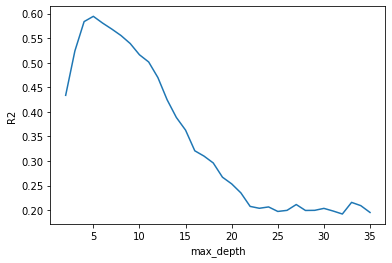

In [52]:
plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');

In [53]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
5,0.594702,0.603933
4,0.584005,0.582625
6,0.581023,0.615562
7,0.568773,0.628006
8,0.55559,0.64253


In [54]:
dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_5.fit(X_train, y_train)
train_5_score = dec_tree_5.score(X_train, y_train)
test_5_score = dec_tree_5.score(X_test, y_test)

print(train_5_score)
print(test_5_score)

0.6039330279227335
0.5947024005843626


In [55]:
#Creating model predictions based on Linear Regression
train_pred_tree = dec_tree_5.predict(X_train)
test_pred_tree = dec_tree_5.predict(X_test)

In [56]:
#Evaluating the model
train_RMSE = np.sqrt(np.mean(np.abs(train_pred_tree - y_train)**2))
test_RMSE = np.sqrt(np.mean(np.abs(test_pred_tree - y_test)**2))

print(f'Model Training RMSE: {train_RMSE}')
print(f'Model Testing RMSE: {test_RMSE}')

Model Training RMSE: 1082.6553744791681
Model Testing RMSE: 1057.4530115283153


In [57]:
train_r2 = np.corrcoef(y_train, train_pred_tree)[0][1]**2
test_r2 = np.corrcoef(y_test, test_pred_tree)[0][1]**2

print(f'Model Training R2: {train_r2}')
print(f'Model Testing R2 {test_r2}')

Model Training R2: 0.6039330279227338
Model Testing R2 0.595560043215285


##Final Thoughts

So looking at the results after correcting some mistakes, the Tree Regressor goes appear to have the better results, as well as if I was going to show this data as is to a shareholder, I also think the visual the Tree creates is helpful as well.